# **Importing Libraries**

In [1]:
!pip install keras

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

# **Read Images**

In [3]:
# Read input images and assign labels based on folder names
print(os.listdir("C:\Main"))

['Test', 'Train']


# **Append Train & Test Images and Labels**

In [4]:
import glob

SIZE = 256  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("C:\Main\Train/*"):
    label = directory_path.split("\\")[-1]
    
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

AB
C:\Main\Train\AB\AB_A1_L1_1024_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L1_1024_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L1_1024_0_zoomed_out.png
C:\Main\Train\AB\AB_A1_L1_1280_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L1_1280_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L1_1280_0_zoomed_out.png
C:\Main\Train\AB\AB_A1_L1_256_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L1_256_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L1_512_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L1_768_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L1_768_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L1_768_0_zoomed_out.png
C:\Main\Train\AB\AB_A1_L2_0_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L2_0_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L2_0_0_zoomed_out.png
C:\Main\Train\AB\AB_A1_L2_1024_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L2_1024_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L2_1024_0_zoomed_out.png
C:\Main\Train\AB\AB_A1_L2_1280_0_rotated_acw.png
C:\Main\Train\AB\AB_A1_L2_1280_0_rotated_cw.png
C:\Main\Train\AB\AB_A1_L2_256_0_rotated_acw.

In [5]:
import glob# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("C:\Main\Test/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

QA
C:\Main\Test\AB\AB_A1_L1_256_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L1_512_0_rotated_cw.png
C:\Main\Test\AB\AB_A1_L1_512_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L2_1280_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L2_512_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L3_1280_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L3_1280_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L3_256_0_rotated_cw.png
C:\Main\Test\AB\AB_A1_L3_768_0_rotated_cw.png
C:\Main\Test\AB\AB_A1_L4_1024_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L5_1024_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L5_256_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L5_512_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L6_1024_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L6_1280_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L6_256_0_rotated_cw.png
C:\Main\Test\AB\AB_A1_L7_1024_0_zoomed_out.png
C:\Main\Test\AB\AB_A1_L7_1280_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L7_256_0_rotated_cw.png
C:\Main\Test\AB\AB_A1_L7_768_0_rotated_acw.png
C:\Main\Test\AB\AB_A1_L8_1024_0_rotated_acw.png
C:\Main\Test\A

# **Encode the Labels for Train & Test Images**

In [6]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# **Visualize Train & Test Data**

In [7]:
from collections import Counter

# Count the number of images for each class in train data
train_class_counts = Counter(train_labels_encoded)
print(train_class_counts)

Counter({2: 691, 1: 540, 0: 520})


In [8]:
# Count the number of images for each class in test data
test_class_counts = Counter(test_labels_encoded)
print(test_class_counts)


Counter({2: 173, 1: 135, 0: 131})


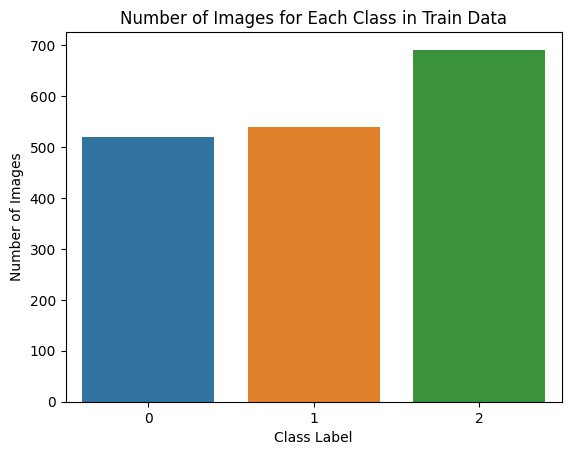

In [9]:
# Create a bar chart for the number of images for each class in train data
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Number of Images for Each Class in Train Data")
plt.show()


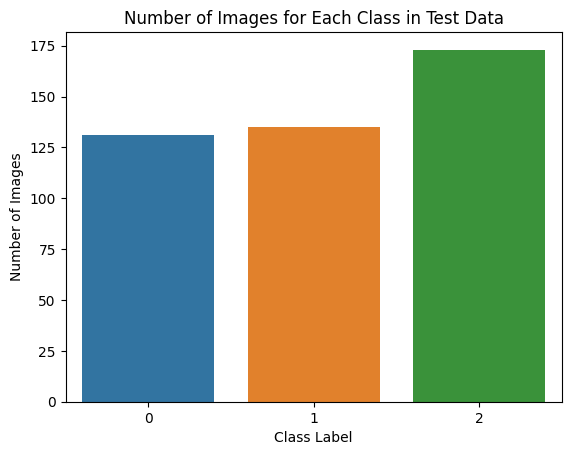

In [10]:
# Create a bar chart for the number of images for each class in train data
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()))
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Number of Images for Each Class in Test Data")
plt.show()

# **Renaming the conventions for ease**

In [11]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# **Normalize Pixel Values**

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# **One Hot Encoding**

In [13]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# **VGG**

 **Load VGG Model**

In [14]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

In [16]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

**Feature Extraction for Train Data**

In [17]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF

55/55 [==============================] - 526s 8s/step


**Random Forest Classifier**

In [18]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

**Feature Extraction for Test Data**

In [19]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

14/14 [==============================] - 114s 8s/step


**Predictions**

In [20]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
#prediction_RF = le.inverse_transform(prediction_RF)

**Accuracy**

In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels_encoded, prediction_RF))

Accuracy =  0.9498861047835991


**Other Metrics**

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,f1_score


#Print overall accuracy
from sklearn import metrics
#print ("Accuracy = ", metrics.accuracy_score(test_labels_encoded, prediction_RF))

print('Accuracy score: %.2f%%' %(accuracy_score(test_labels_encoded, prediction_RF)*100))  
print('Precision score: %.2f%%' % (precision_score(test_labels_encoded, prediction_RF, average= 'weighted')*100))
print('Recall score: %.2f%%' % (recall_score(test_labels_encoded, prediction_RF, average= 'weighted')*100))
print('F1 score: %.2f%%' % (f1_score(test_labels_encoded, prediction_RF, average= 'weighted')*100))

Accuracy score: 94.99%
Precision score: 95.09%
Recall score: 94.99%
F1 score: 95.00%


**Confusion Matrix**

<Axes: >

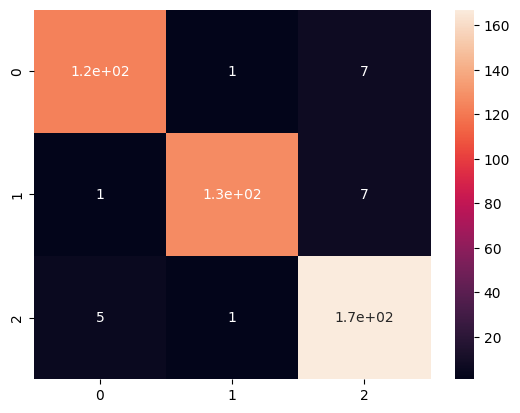

In [23]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels_encoded, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

**Make Predictions on Test Data**

1/1 [==============================] - 0s 322ms/step
The prediction for this image is:  ['AB']
The actual label for this image is:  AB


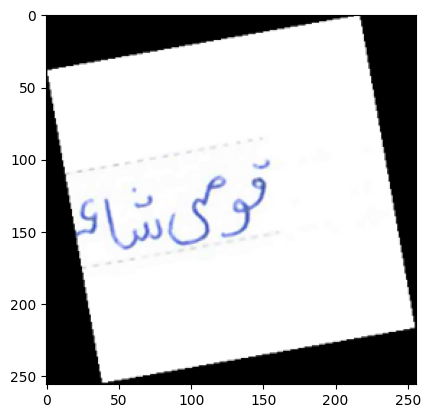

In [27]:
#Check results on a few select images
n=np.random.randint(5, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

**Support Vecor Machine**

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Create an instance of SVC with a linear kernel
svm = SVC(kernel='linear')

# Fit the SVM model to the training data
svm.fit(X_for_RF, y_train)

SVC(kernel='linear')

***Predictions using SVM***

In [29]:
# Make predictions on the test data
prediction_SVM = svm.predict(X_test_features)


***Accuracy using SVM***

In [30]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels_encoded, prediction_SVM))

Accuracy =  0.9954441913439636


***Confusion Matrix for SVM***

<Axes: >

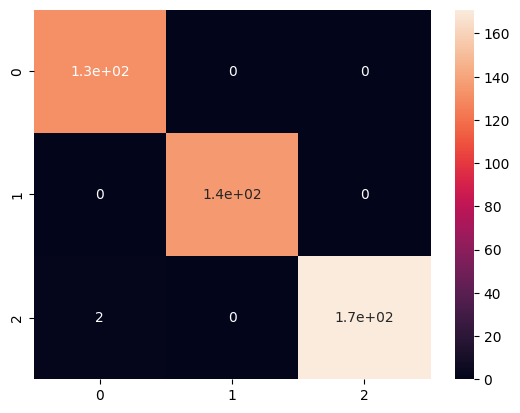

In [31]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(test_labels_encoded, prediction_SVM)
#print(cm)
sns.heatmap(cm1, annot=True)

***Check predictions on few images using SVM***

1/1 [==============================] - 0s 328ms/step
The prediction for this image is:  ['MK']
The actual label for this image is:  MK


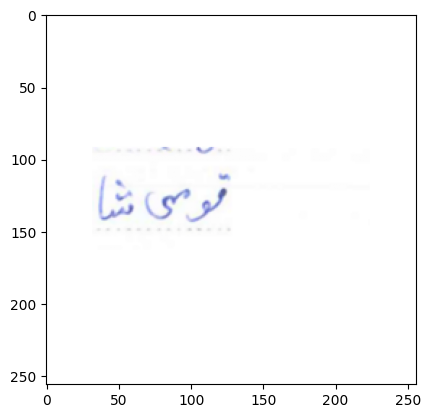

In [34]:
#Check results on a few select images
n=np.random.randint(100, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_SVM = svm.predict(input_img_features)[0] 
prediction_SVM = le.inverse_transform([prediction_SVM])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", test_labels[n])